In [271]:
import pandas as pd
import numpy as np

In [272]:
from sklearn.model_selection import KFold, StratifiedKFold

In [291]:
# https://www.kaggle.com/becksddf/churn-in-telecoms-dataset
df = pd.read_csv(r'C:\Python\Ykill\DataScinese\data\telecom_churn.csv')

In [292]:
y = df["Churn"].astype(int)

In [299]:
X = df.drop(columns=['Churn', 'Area code'])

In [301]:
X = X.select_dtypes(np.number)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
Account length            3333 non-null int64
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64
dtypes: float64(8), int64(7)
memory usage: 390.7 KB


## Task 1

Убедиться, что StratifiedKFold в отличии от KFold сохраняет соотношение классов. (Дописать код, вывести таблицы/графики соотношения для KFold и StratifiedKFold). Привести случай, когда KFold будет работать очень плохо

In [346]:
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold

kf = KFold(n_splits=50)
skf = StratifiedKFold(n_splits=50)

In [347]:
def ret_dat(df, id_list):
    
    data = df.iloc[id_list]
    
    return data

In [348]:
def mean_trtst(tr, tst):
    s1 = tr.mean()
    s2 = tst.mean()
    data = pd.concat([s1, s2], axis=1)
    data.columns = ['train','test']
    return data

In [349]:
def plot_pd(data, name):
    kf_data.plot(title=name,kind="bar");

#### тестирование для KFold

In [350]:
res_tr = None
res_tst = None

for train_index, test_index in kf.split(X): 
    res_tr = ret_dat(X, train_index.tolist())
    res_tst = ret_dat(X, test_index.tolist())
    break

In [351]:
kf_data = mean_trtst(res_tr, res_tst)
kf_data

,train,test
Account length,101.161666,96.343284
Number vmail messages,8.082976,8.880597
Total day minutes,179.841335,176.546269
Total day calls,100.484691,98.044776
Total day charge,30.573564,30.013582
Total eve minutes,200.979241,201.034328
Total eve calls,100.168096,97.492537
Total eve charge,17.083451,17.087910
Total night minutes,200.981782,195.522388
Total night calls,100.126148,99.208955


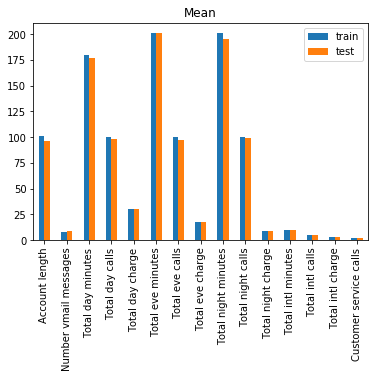

In [352]:
plot_pd(kf_data, 'Mean')

#### тестирование для StratifiedKFold

In [353]:
res_tr = None
res_tst = None

for train_index, test_index in skf.split(X, y): 
    res_tr = ret_dat(X, train_index.tolist())
    res_tst = ret_dat(X, test_index.tolist())
    break

In [354]:
skf_data = mean_trtst(res_tr, res_tst)
skf_data

,train,test
Account length,101.116044,98.567164
Number vmail messages,8.095530,8.268657
Total day minutes,179.816963,177.734328
Total day calls,100.475199,98.507463
Total day charge,30.569424,30.215373
Total eve minutes,200.989100,200.553731
Total eve calls,100.162584,97.761194
Total eve charge,17.084290,17.047015
Total night minutes,200.967453,196.220896
Total night calls,100.124923,99.268657


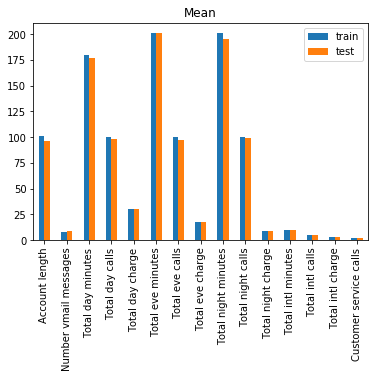

In [355]:
plot_pd(skf_data, 'Mean')

### выводы:

In [371]:
mask_y = y.value_counts(normalize=True)
print(f'сотношение предсказываемых событий {round(mask_y[0],2)} к {round(mask_y[1],2)}')

сотношение предсказываемых событий 0.86 к 0.14


- при уменьшении данных в такой же пропорции __KFold(n_splits=4)__ будет брать подвыборку менее похожую на общие данные
* ниже приведен пример, в котором __StratifiedKFold__ справляется с таким случаем лучше

In [373]:
mtrx = np.zeros([12, 3], dtype = int) # create matrix

n = 3
while n>0:
    n -= 1
    mtrx[n-1] = [ n, n, 1]
    
y = mtrx[:,2]
X = mtrx[:,0:2]

In [374]:
kf = KFold(n_splits=3)
skf = StratifiedKFold(n_splits=3)

In [375]:
# KFold test
for train_index, test_index in kf.split(X):
    print(f'Train part mean: {X[train_index].mean()}')
    print(f'Test part mean: {X[test_index].mean()}')
    break

Train part mean: 0.0
Test part mean: 0.75


In [376]:
# StratifiedKFold test
for train_index, test_index in skf.split(X, y):
    print(f'Train part mean: {X[train_index].mean()}')
    print(f'Test part mean: {X[test_index].mean()}')
    break

Train part mean: 0.25
Test part mean: 0.25


тут наглядно видно, что __KFold__ не делает подвыборку согласно данным по __*y*__

In [3]:
## too much code to prove that

## Task 2
Написать функцию, которая будет находить наилучшее разбиение(по индексу). 

Вход: для листа с целочисленными значениями inp = [0, 1, 0, 0, 1, 1, 1, 0] . <br>
Выход: индекс, по которому наиболее оптимально разбить выборку. <br>

(Применить энтропию Шеннона)

In [2]:
import numpy as np
import math

# Shannon Entropy
def sh_entropy(x_list):
    Ni = x_list.count(tuple(set(x_list))[0])
    Nj = x_list.count(tuple(set(x_list))[1])
    N = len(x_list)
    pi = Ni/N
    pj = Nj/N
    result = - (pi * math.log(pi)) - (pj * math.log(pj)) # math.log(X,[база]) без базы = Ln(X)
    return round(result, 2)
    

In [5]:
def split(x_list):
    
    global full_entr
    
    idx = 0
    for i in x_list:
        idx+=1
        if x_list[idx] != x_list[idx - 1]:
            break

    while idx+1 < len(x_list)-1:
        a_list = x_list[:idx+1]
        b_list = x_list[idx+1:]
        a_entr = sh_entropy(a_list)
        b_entr = sh_entropy(b_list)
        if (a_entr < full_entr) and (b_entr < full_entr):
            print(f'по индексу {idx} этропия частей составила {a_entr, b_entr}')
        idx += 1 

In [10]:
inp = [0, 1, 0, 1, 0, 1, 0, 1]
full_entr = sh_entropy(inp)
print(f'Энтропия всего сэта = {full_entr}')
split(inp)

Энтропия всего сэта = 0.69
по индексу 2 этропия частей составила (0.64, 0.67)
по индексу 4 этропия частей составила (0.67, 0.64)


In [4]:
# just give me the best

## Task 3

применить свежеизученные алгоритмы (Дерево Решений, Случайный Лес, XGBoost) для задачи регрессии (оценка недвижимости https://www.kaggle.com/harlfoxem/housesalesprediction). Решение по данной задаче слать отдельным ноутбуком
